<a href="https://colab.research.google.com/github/Pondorasti/DS-2.1/blob/main/Class%20Work/Linear_Regression%20(Boston_Housing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework Linear Regression

- The dataset you are working is Boston Housing Price

- The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target. 

- For this assignment, your task is to:

✅ 1 - Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 

✅ 2 - Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

✅ 3 - Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

✅ 4 - Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

Hint: `from sklearn.model_selection import train_test_split`

Hint: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

✅ 5 - Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

✅ 6 - Compute, Mean-Square-Error (MSE) and R Squared score of your Model 

Hint: `from sklearn.metrics import r2_score`

Hint: `from sklearn.metrics import mean_squared_error`

In [ ]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
boston = load_boston()

# print(boston.data)
# print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

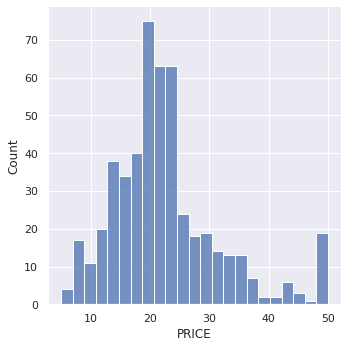

In [ ]:
sns.displot(bos["PRICE"])

## Apply data normalization (Scaling) to improve the prediction result

- Use StandardScaler and then train your Linear Regression Model. Compare the R Square score with previous one you got

- Use MinMaxScaler and then train your Linear Regression Model. Compare the R Square score with previous one you got

- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

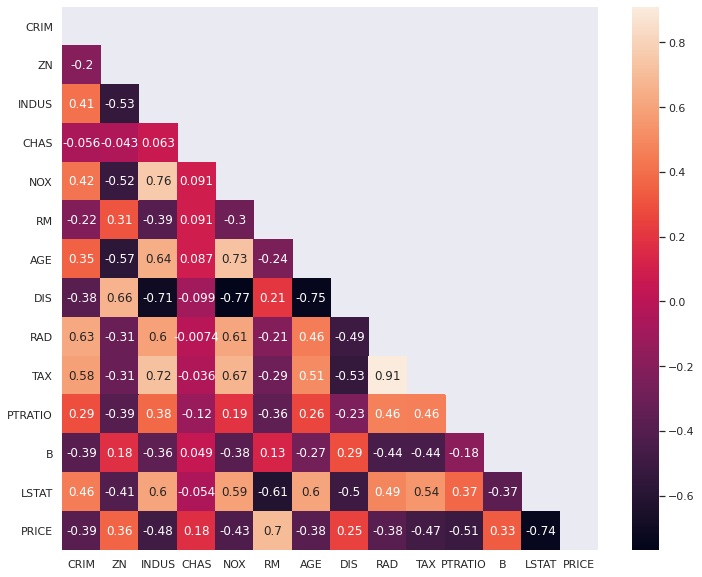

In [ ]:
correlation = bos.corr()

plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, mask=mask)

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ["LSTAT", "RM"]
X = bos[feature_cols]
y = bos["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

lr_reg.coef_

array([-0.67451869,  5.01785312])

In [ ]:
lr_reg.intercept_

-0.6047107435076988

In [ ]:
print(f"Predicted {lr_reg.predict(X_test.head(1))[0]} vs Actual {y_test.head(1)}")

Predicted 26.222385905897035 vs Actual 329    22.6
Name: PRICE, dtype: float64


In [ ]:
lr_reg.predict(X_test)

array([26.22238591, 24.15810116, 24.29162097, 12.90055111, 22.34298929,
       22.95627108, 21.30247295, 23.07555807, 15.8231566 , 24.36450484,
       15.37806492, 18.4858509 , 19.21380842,  3.66295343, 37.24950345,
       31.52877451, 23.47239772, 33.20834872, 28.64697119, 22.83420112,
       26.78347886, 20.78580578, 20.635707  , 27.07122382, 21.01989488,
        9.78792173, 19.99818966, 17.39156262, 37.04462243, 18.43652607,
       18.26913884, 19.99342936, 23.7900781 , 21.61507229, 25.49218594,
       18.63893731, 11.38031057, 22.88545039, 19.35011119, 14.05939977,
       24.35230499, 18.88414797, 24.09360396, 14.39140912, 26.37746202,
       25.44982334, 17.76428279, 19.95098846,  4.24117069, 26.79642116,
       20.13385095, 15.97498752, 21.54892605, 38.44994205, 16.60715116,
       18.34873768, 19.64289186, 20.44443518, 21.46368573, 17.6527561 ,
       23.66583644, 21.48280248, 31.15177894, 29.73607265, 18.10638829,
       29.21652911, 20.82988542, 17.60023141, 20.43563917, 21.62

In [ ]:
y_test

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
49     19.4
498    21.2
309    20.3
124    18.8
306    33.4
Name: PRICE, Length: 127, dtype: float64

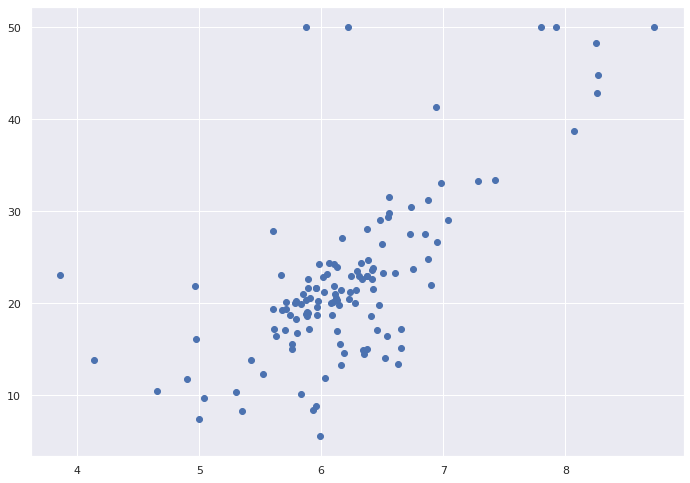

In [ ]:
# predicted = 
plt.scatter(X_test["RM"], y_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lr_reg.predict(X_test)
r2 = r2_score(y_test, y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred=y_pred)

print(f"R2: {r2}\nMSE: {mse}")

R2: 0.5692445415835348
MSE: 35.19229684718286
